<a href="https://colab.research.google.com/github/AndresChavez123/SenalesySistemas/blob/main/Tarea24y26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

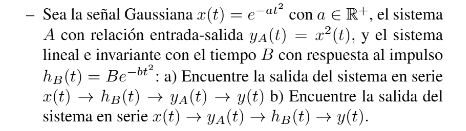

Inciso (a):
𝑥
(
𝑡
)
→
ℎ
𝐵
(
𝑡
)
→
𝑦
𝐴
(
𝑡
)
→
𝑦
(
𝑡
)

Primera etapa:
𝑥
(
𝑡
)
→
ℎ
𝐵
(
𝑡
)

Como
ℎ
𝐵
(
𝑡
) es la respuesta al impulso de un sistema LTI, esto es una convolución:



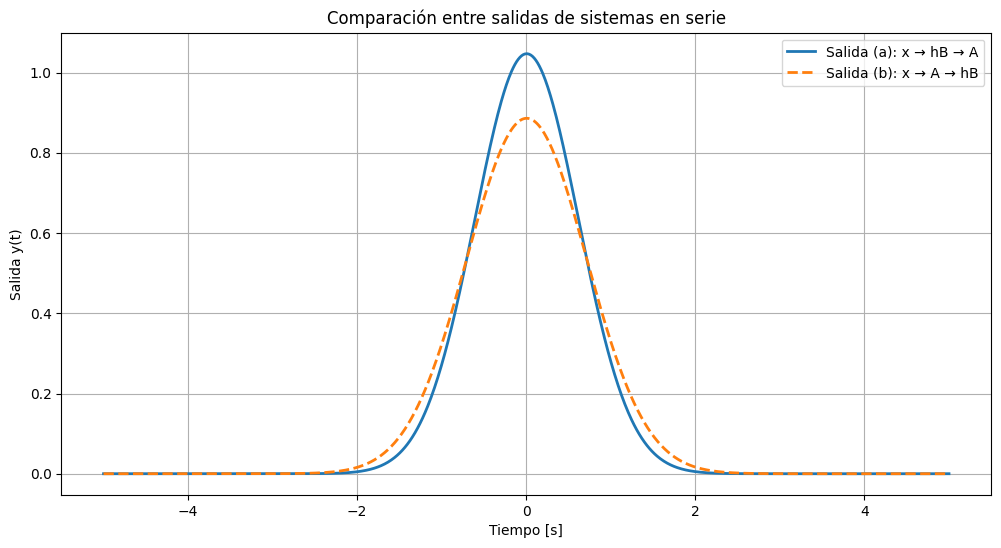

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
a = 1
b = 2
B = 1

# Tiempo
t = np.linspace(-5, 5, 1000)

# Entrada: gaussiana
x = np.exp(-a * t**2)

# Sistema A: yA(t) = x(t)^2
yA = x**2  # para el inciso (b)

# Sistema B: hB(t) = B * exp(-b*t^2)
hB = B * np.exp(-b * t**2)

# Convolución para (a): x -> hB -> A
x_conv_hB = np.convolve(x, hB, mode='same') * (t[1] - t[0])
y_a = x_conv_hB**2  # luego sistema A

# Convolución para (b): x -> A -> hB
yA_conv_hB = np.convolve(yA, hB, mode='same') * (t[1] - t[0])

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(t, y_a, label='Salida (a): x → hB → A', lw=2)
plt.plot(t, yA_conv_hB, label='Salida (b): x → A → hB', lw=2, linestyle='--')
plt.title('Comparación entre salidas de sistemas en serie')
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida y(t)')
plt.grid(True)
plt.legend()
plt.show()


Explicacion del codigo y lo que se muestra

- Dos curvas Gaussianas suavizadas.

- La diferencia entre aplicar primero la convolución o el cuadrado.

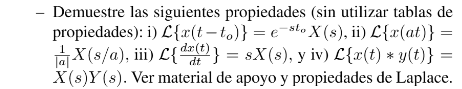

In [2]:
import sympy as sp

# Definimos variables simbólicas
t, s, tau, a, t0 = sp.symbols('t s tau a t0', real=True, positive=True)
x = sp.Function('x')(t)

# Función ejemplo para probar: x(t) = exp(-t)
x_func = sp.exp(-t)

# 1) Desplazamiento: L{x(t - t0)} = e^{-s t0} X(s)
x_shifted = x_func.subs(t, t - t0)
laplace_shifted = sp.laplace_transform(x_shifted, t, s, noconds=True)
X_s = sp.laplace_transform(x_func, t, s, noconds=True)
propiedad1 = sp.simplify(laplace_shifted - sp.exp(-s * t0) * X_s)

# 2) Escalamiento: L{x(at)} = (1/a) X(s/a)
x_scaled = x_func.subs(t, a * t)
laplace_scaled = sp.laplace_transform(x_scaled, t, s, noconds=True)
X_scaled_expected = (1 / a) * X_s.subs(s, s / a)
propiedad2 = sp.simplify(laplace_scaled - X_scaled_expected)

# 3) Derivada: L{dx/dt} = s X(s) - x(0)
x_deriv = sp.diff(x_func, t)
laplace_deriv = sp.laplace_transform(x_deriv, t, s, noconds=True)
x0 = x_func.subs(t, 0)
propiedad3 = sp.simplify(laplace_deriv - (s * X_s - x0))

# 4) Convolución: L{x * y} = X(s) * Y(s)
y_func = sp.exp(-2 * t)
conv = sp.integrate(x_func.subs(t, tau) * y_func.subs(t, t - tau), (tau, 0, t))
laplace_conv = sp.laplace_transform(conv, t, s, noconds=True)
X1 = sp.laplace_transform(x_func, t, s, noconds=True)
Y1 = sp.laplace_transform(y_func, t, s, noconds=True)
propiedad4 = sp.simplify(laplace_conv - X1 * Y1)

# Mostrar resultados
print("Propiedad 1 (Desplazamiento):", propiedad1)
print("Propiedad 2 (Escalamiento):", propiedad2)
print("Propiedad 3 (Derivada):", propiedad3)
print("Propiedad 4 (Convolución):", propiedad4)


Propiedad 1 (Desplazamiento): (exp(s*t0 + t0) - 1)*exp(-s*t0)/(s + 1)
Propiedad 2 (Escalamiento): 0
Propiedad 3 (Derivada): 0
Propiedad 4 (Convolución): 0


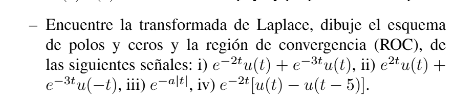

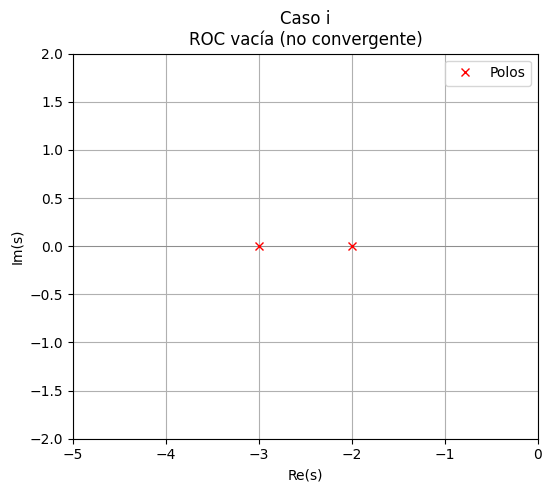

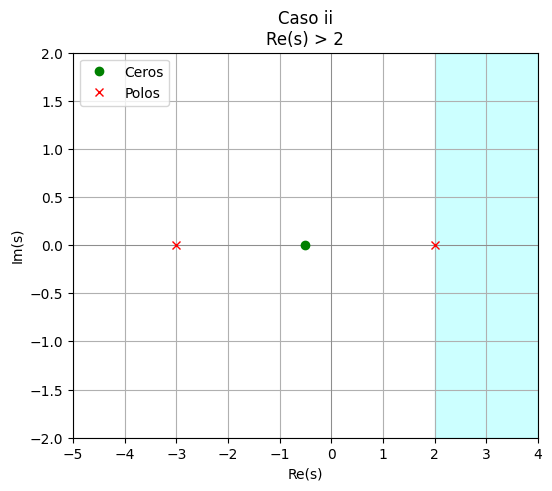

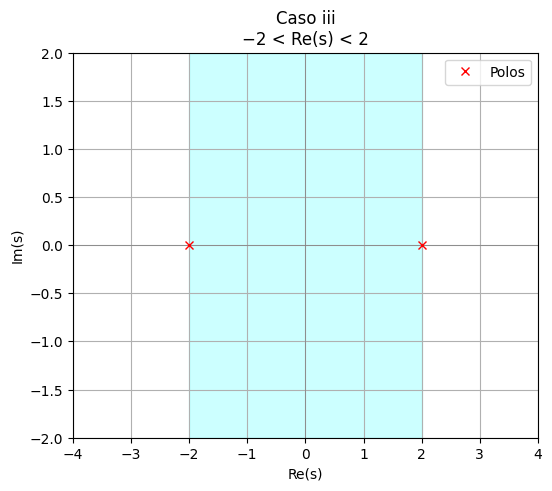

/tmp/ipython-input-7-449994147.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


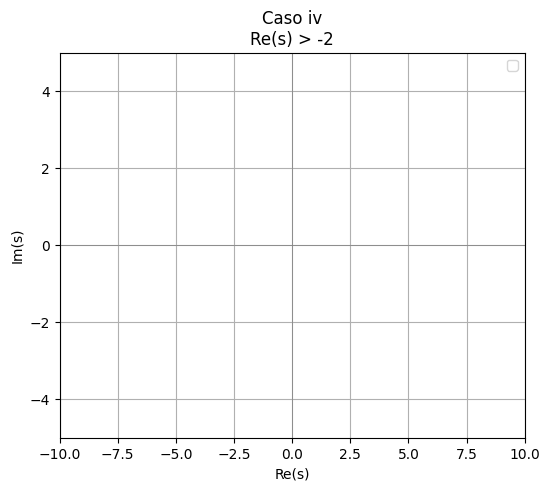

In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Variables simbólicas
s, a = sp.symbols('s a', real=True)

# Señales definidas simbólicamente
X1 = 1/(s + 2) - 1/(s + 3)                      # Caso i
X2 = 1/(s - 2) + 1/(s + 3)                      # Caso ii
X3 = 1/(s + a) - 1/(s - a)                      # Caso iii
X4 = (1 - sp.exp(-5*(s + 2))) / (s + 2)         # Caso iv

# Sustituciones para evaluar
X3_eval = X3.subs(a, 2)
casos = [X1, X2, X3_eval, X4]
rocs = [
    "ROC vacía (no convergente)",
    "Re(s) > 2",
    "−2 < Re(s) < 2",
    "Re(s) > -2"
]
titulos = ['Caso i', 'Caso ii', 'Caso iii', 'Caso iv']

def graficar_polos_ceros(expr, titulo, roc_texto):
    num, den = sp.fraction(sp.simplify(expr))  # Numerador y denominador simbólicos


    try:

        simplified_expr = sp.simplify(expr)
        num_for_zeros, den_for_zeros = sp.fraction(simplified_expr)


        ceros_sym = sp.solve(num_for_zeros, s)

        ceros = [complex(root) for root in ceros_sym]

    except Exception as e:
        print(f"Error finding zeros for {titulo}: {e}")
        ceros = []


    try:

        simplified_expr = sp.simplify(expr)
        num_for_polos, den_for_polos = sp.fraction(simplified_expr)


        polos_sym = sp.solve(den_for_polos, s)


        polos = [complex(root) for root in polos_sym]
    except Exception as e:
        print(f"Error finding poles for {titulo}: {e}")
        polos = []



    fig, ax = plt.subplots(figsize=(6, 5))
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)

    if len(ceros) > 0:
        # Filter out infinite zeros if any
        finite_ceros = [c for c in ceros if np.isfinite(c)]
        if finite_ceros:
            ax.plot([c.real for c in finite_ceros], [c.imag for c in finite_ceros], 'go', label='Ceros')

    if len(polos) > 0:
         # Filter out infinite poles if any
        finite_polos = [p for p in polos if np.isfinite(p)]
        if finite_polos:
            ax.plot([p.real for p in finite_polos], [p.imag for p in finite_polos], 'rx', label='Polos')


    ax.set_title(f'{titulo}\n{roc_texto}')
    ax.set_xlabel('Re(s)')
    ax.set_ylabel('Im(s)')
    ax.grid(True)
    ax.legend()


    all_roots_real = [r.real for r in ceros + polos if np.isfinite(r.real)]
    all_roots_imag = [r.imag for r in ceros + polos if np.isfinite(r.imag)]

    if all_roots_real and all_roots_imag:
        min_re, max_re = min(all_roots_real), max(all_roots_real)
        min_im, max_im = min(all_roots_imag), max(all_roots_imag)
        ax.set_xlim(min_re - 2, max_re + 2)
        ax.set_ylim(min_im - 2, max_im + 2)
    else:
         ax.set_xlim(-10, 10)
         ax.set_ylim(-5, 5)


    # Sombrear ROC aproximada
    if titulo == 'Caso ii':
        ax.axvspan(2, ax.get_xlim()[1], color='cyan', alpha=0.2, label='ROC')
    elif titulo == 'Caso iii':
        # For poles at -2 and 2, ROC is -2 < Re(s) < 2
        if -2 in [p.real for p in polos] and 2 in [p.real for p in polos]:
             ax.axvspan(-2, 2, color='cyan', alpha=0.2, label='ROC')
    elif titulo == 'Caso iv':
        # For pole at -2, ROC is Re(s) > -2
         if -2 in [p.real for p in polos]:
            ax.axvspan(-2, ax.get_xlim()[1], color='cyan', alpha=0.2, label='ROC')


    plt.show()

# Ejecutar todos los casos
for i in range(4):
    graficar_polos_ceros(casos[i], titulos[i], rocs[i])



Gráficas del plano complejo
𝑠


Marcas de polos (x rojas) y ceros (o verdes).

ROC sombreada si existe.

Títulos con el caso y su región de convergencia.